In [8]:
import os
from IPython.display import clear_output

import torch
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch_geometric.loader.dataloader import DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

from ClusterDataset import ClusterDataset
from training import *
from GNN_TrackLinkingNet import GNN_TrackLinkingNet, FocalLoss, weight_init

In [9]:
# CUDA Setup
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [10]:
# Load the dataset
hist_folder = "/eos/user/c/czeh/histo_new/"
data_folder_training = "/eos/user/c/czeh/graph_data"
data_folder_test = "/eos/user/c/czeh/graph_data_test"

model_folder = "/eos/user/c/czeh/model"
dataset_training = ClusterDataset(data_folder_training, hist_folder)
dataset_test = ClusterDataset(data_folder_test, hist_folder, test=True)

In [11]:
dataset_training.get(0)

Data(x=[44, 29], edge_index=[2, 210], y=[210], num_nodes=44, edges_features=[210, 7])

In [12]:
train_dl = DataLoader(dataset_training, shuffle=True)
test_dl = DataLoader(dataset_test, shuffle=True)

In [21]:
epochs = 1000
start_epoch = 0

model = GNN_TrackLinkingNet(input_dim = dataset_training.get(0).x.shape[1], 
                                edge_feature_dim=dataset_training.get(0).edges_features.shape[1],
                                edge_hidden_dim=16, hidden_dim=16, weighted_aggr=True)
                               #dropout=0)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#scheduler = StepLR(optimizer, step_size=20, gamma=0.5)

scheduler = CosineAnnealingLR(optimizer, epochs, eta_min=1e-6)
loss_obj = FocalLoss(alpha=0.45, gamma=2)

model.apply(weight_init)

weights = torch.load(model_folder + "/model_epoch_100_loss_68.7351.pt", weights_only=True)
model.load_state_dict(weights["model_state_dict"])
optimizer.load_state_dict(weights["optimizer_state_dict"])
start_epoch = weights["epoch"]

/eos/home-i04/c/czeh/SWAN_projects/Graph_Linking/ClusterDataset.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(osp.join(self.processed_dir, f'data_{

>>> Saving model to /eos/user/c/czeh/model/model_epoch_602_loss_68.0867.pt


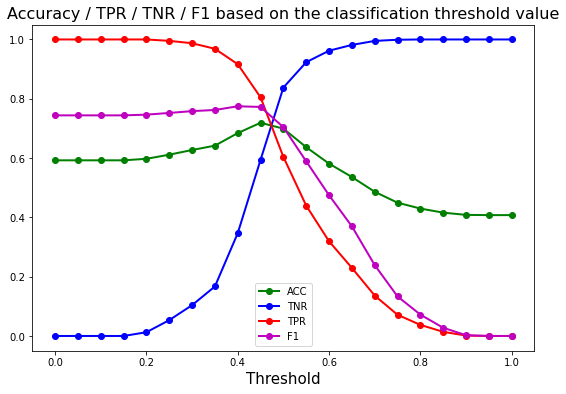

Chosen classification threshold is: 0.475
Edge labels: number of positive: 1382.7535000000003
Predictions: number of positive: 1369


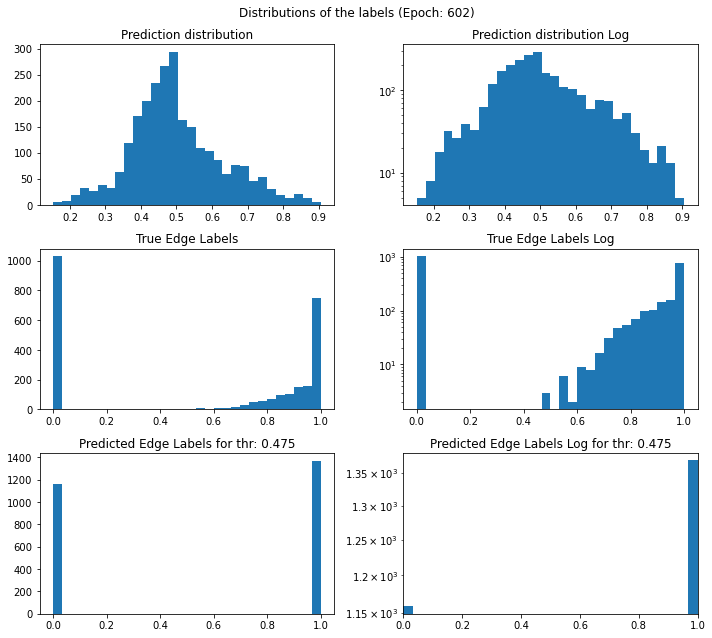

[0.45214897 0.37637499 0.42270443 ... 0.60290915 0.5720492  0.54771125]
Confusion matrix:
[[ 746  284]
 [ 412 1085]]

Confusion matrix weighted:
[[0.36213592 0.13786408]
 [0.13760855 0.36239145]]

TN: 746 	 FN: 412 	 TP: 1085 	 FP: 284
Confusion matrix scaled:
[[0.29521171 0.11238623]
 [0.16303918 0.42936288]]

Accuracy: 0.7246
Precision: 0.7925
Negative predictive value: 0.6442
Recall: Correctly classifying 72.4783 % of positive edges
True negative rate: Correctly classifying 72.4272 % of all negative edges
F1 score: 0.7572
[0.72464218 0.72441268] [0.72427184 0.7247829 ] [0.72445696 0.72459774]
Balanced accuracy: 0.7245
Precision weighted: [0.72464218 0.72441268]
Recall weighted: [0.72427184 0.7247829 ]
F1 score weighted: [0.72445696 0.72459774]
positive_likelihood_ratio: 2.628614035582903, negative_likelihood_ratio: 0.3799914395368037


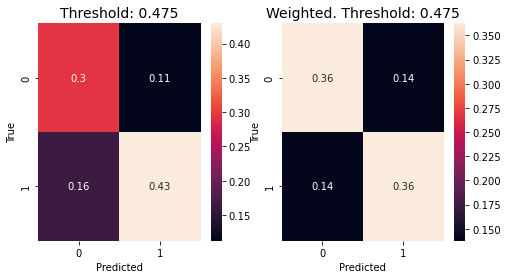

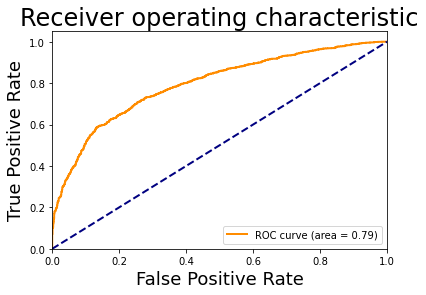

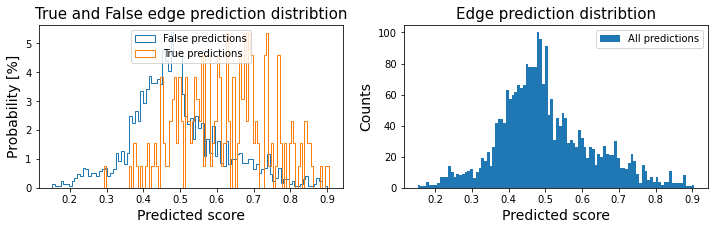

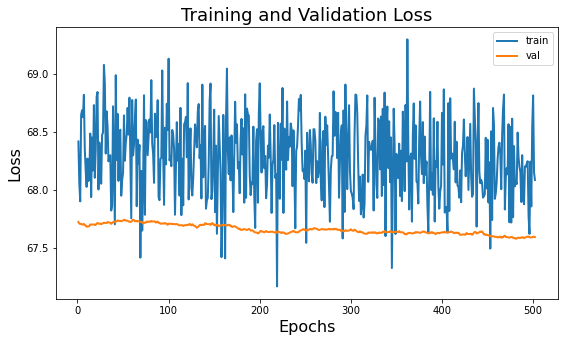

Training epoch 603:   0%|          | 0/100 [00:00<?, ?it/s]/eos/home-i04/c/czeh/SWAN_projects/Graph_Linking/ClusterDataset.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

Epoch: 603, train loss: 69.4206
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 64.22it/s]


Epoch: 603, val loss: 67.5983


Training epoch 604: 100%|██████████| 100/100 [00:02<00:00, 49.47it/s]


Epoch: 604, train loss: 68.6497
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 65.90it/s]


Epoch: 604, val loss: 67.6000


Training epoch 605: 100%|██████████| 100/100 [00:01<00:00, 50.78it/s]


Epoch: 605, train loss: 67.9267
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 55.24it/s]


Epoch: 605, val loss: 67.6014


Training epoch 606: 100%|██████████| 100/100 [00:01<00:00, 50.07it/s]


Epoch: 606, train loss: 68.5033
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 56.80it/s]


Epoch: 606, val loss: 67.6014


Training epoch 607: 100%|██████████| 100/100 [00:02<00:00, 44.35it/s]


Epoch: 607, train loss: 68.1660
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 46.56it/s]


Epoch: 607, val loss: 67.5977


Training epoch 608: 100%|██████████| 100/100 [00:02<00:00, 40.90it/s]


Epoch: 608, train loss: 67.6697
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 46.21it/s]


Epoch: 608, val loss: 67.6003


Training epoch 609: 100%|██████████| 100/100 [00:02<00:00, 41.50it/s]


Epoch: 609, train loss: 67.6132
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 56.08it/s]


Epoch: 609, val loss: 67.5947


Training epoch 610: 100%|██████████| 100/100 [00:02<00:00, 41.78it/s]


Epoch: 610, train loss: 68.4780
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 47.66it/s]


Epoch: 610, val loss: 67.5957


Training epoch 611: 100%|██████████| 100/100 [00:02<00:00, 41.16it/s]


Epoch: 611, train loss: 68.6568
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 53.76it/s]

Epoch: 611, val loss: 67.5958



Training epoch 612: 100%|██████████| 100/100 [00:02<00:00, 40.76it/s]


Epoch: 612, train loss: 67.8038
Validation step


Validation: 100%|██████████| 10/10 [00:00<00:00, 48.63it/s]


Epoch: 612, val loss: 67.6008


Training epoch 613:  19%|█▉        | 19/100 [00:00<00:01, 43.96it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
decision_th = 0.5
os.makedirs(model_folder, exist_ok=True)

train_loss_hist = []
val_loss_hist = []
edge_features = True

for epoch in range(start_epoch, epochs):
    loss = train(model, optimizer, train_dl, epoch+1, device=device, edge_features=edge_features, loss_obj=loss_obj)
    train_loss_hist.append(loss)
    print(f'Epoch: {epoch+1}, train loss: {loss:.4f}')
    
    # Validation
    model.eval()
    pred, lab, y = [], [], []
    val_loss, j = 0, 0
    print("Validation step")
    for sample in tqdm(test_dl, desc="Validation"):
        sample = sample.to(device)
        
        if edge_features:
            if sample.edge_index.shape[1] != sample.edges_features.shape[0]:
                continue
            data = prepare_network_input_data(sample.x, sample.edge_index, edge_features=sample.edges_features)
        else: 
            data = prepare_network_input_data(sample.x, sample.edge_index)
        #nn_pred, edge_emb = model(*data, device=device)
        nn_pred = model(*data, device=device)
        pred += nn_pred.tolist()
        y += (sample.y>0).int().tolist()
        lab += sample.y.tolist()
        val_loss += loss_obj(nn_pred, sample.y.float()).item()
        j += 1
        
    val_loss = float(val_loss)/j
    print(f'Epoch: {epoch+1}, val loss: {val_loss:.4f}')
    val_loss_hist.append(val_loss)
    
#     if (True):
    if ((epoch - 1) % 200 == 0):
        clear_output(wait=True)
        
        print(f">>> Saving model to {model_folder + f'/model_epoch_{epoch+1}_loss_{loss:.4f}.pt'}")
        torch.save({'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                }, model_folder + f'/model_epoch_{epoch+1}_loss_{loss:.4f}.pt')
        
        TNR, TPR, thresholds = classification_thresholds_plot(np.array(pred), np.array(y),
                                                              threshold_step=0.05, output_folder=model_folder,
                                                              epoch=epoch+1)
        classification_threshold = get_best_threshold(TNR, TPR, thresholds)
        print(f"Chosen classification threshold is: {classification_threshold}")

        plot_prediction_distribution_standard_and_log(np.array(pred), np.array(lab),
                                                      epoch=epoch+1, thr = classification_threshold,
                                                     folder=model_folder, val=True)

        test(np.array(y), np.array(pred), classification_threshold=classification_threshold,
                            output_folder=model_folder, epoch=epoch+1)
        save_pred(np.array(pred), np.array(lab), epoch=epoch, out_folder=model_folder)
        save_loss(train_loss_hist, val_loss_hist, outputLossFunctionPath=model_folder)

    scheduler.step() 